<a href="https://colab.research.google.com/github/jalalbamniya/DataSet/blob/main/Principal_Component_Analysis(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning to implement PCA in python

$\textbf{Mantadory}$ steps to PCA in python are:

1. Load dataset. If data set is not standardize then first standardize the data set.
2. Use scikit learn to use built in PCA function
3. Pass number of principal components required for given data set to the PCA function in Scikit learn
4. Fit the function to the data set
5. Transform the data

$\textbf{Additional}$ functionality PCA function in scikit learn  are:

1. Printing principal components
2. Scree plot to identify right number of PC's that describe the dataset by looking at cumulative explained variance ratio
3. Biplot to determine impact of each featur on PC

# Loading libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

$\textbf{Loading data set. The following code will generate random data set of size (10 x 5). The data set can be loaded
using pandas.}$

In [30]:
df=pd.read_csv("/content/Pokemon1.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [31]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [32]:
df.dropna(inplace=True)
df.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [33]:
#df.fillna(method="ffill")

In [34]:
df1 =df.drop(columns=["Name",'#'],axis='columns')
df1

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
6,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [35]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['Type 1']= label_encoder.fit_transform(df1['Type 1'])
df1["Type 2"]=label_encoder.fit_transform(df1["Type 2"])
df1["Legendary"]=label_encoder.fit_transform(df1["Legendary"])
df1

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,13,318,45,49,49,65,65,45,1,0
1,9,13,405,60,62,63,80,80,60,1,0
2,9,13,525,80,82,83,100,100,80,1,0
3,9,13,625,80,100,123,122,120,80,1,0
6,6,7,534,78,84,78,109,85,100,1,0
...,...,...,...,...,...,...,...,...,...,...,...
795,15,4,600,50,100,150,100,150,50,6,1
796,15,4,700,50,160,110,160,110,110,6,1
797,14,8,600,80,110,60,150,130,70,6,1
798,14,1,680,80,160,60,170,130,80,6,1


In [36]:
df1.describe()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,9.159420,8.792271,456.628019,70.649758,83.173913,79.676329,77.048309,75.565217,70.514493,3.410628,0.096618
std,5.905527,4.422629,120.849502,22.896557,33.698473,32.593788,33.805061,27.949961,28.521408,1.663010,0.295795
min,0.000000,0.000000,190.000000,1.000000,10.000000,15.000000,10.000000,20.000000,5.000000,1.000000,0.000000
25%,3.000000,6.000000,355.000000,55.000000,59.250000,55.000000,50.000000,55.000000,50.000000,2.000000,0.000000
50%,10.000000,8.000000,475.000000,70.000000,80.000000,75.500000,70.000000,75.000000,70.000000,3.000000,0.000000
75%,15.000000,13.000000,529.500000,85.000000,103.000000,100.000000,100.000000,94.750000,91.000000,5.000000,0.000000
max,17.000000,17.000000,780.000000,150.000000,190.000000,230.000000,180.000000,230.000000,160.000000,6.000000,1.000000


In [37]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
for i in df1.columns:
  y=np.array(df1[i]).reshape(-1,1)
  df1[i]=sc.fit_transform(y)
df1

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.027028,0.952560,-1.148501,-1.121601,-1.015336,-0.942310,-0.356837,-0.378462,-0.895656,-1.451311,-0.327035
1,-0.027028,0.952560,-0.427726,-0.465688,-0.629095,-0.512260,0.087421,0.158861,-0.369099,-1.451311,-0.327035
2,-0.027028,0.952560,0.566446,0.408863,-0.034878,0.102096,0.679764,0.875291,0.332977,-1.451311,-0.327035
3,-0.027028,0.952560,1.394923,0.408863,0.499917,1.330808,1.331341,1.591721,0.332977,-1.451311,-0.327035
6,-0.535641,-0.405740,0.641009,0.321408,0.024544,-0.051493,0.946318,0.337968,1.035053,-1.451311,-0.327035
...,...,...,...,...,...,...,...,...,...,...,...
795,0.990199,-1.084891,1.187803,-0.902963,0.499917,2.160189,0.679764,2.666367,-0.720137,1.558924,3.057777
796,0.990199,-1.084891,2.016280,-0.902963,2.282568,0.931477,2.456794,1.233506,1.386091,1.558924,3.057777
797,0.820661,-0.179357,1.187803,0.408863,0.797026,-0.604414,2.160622,1.949936,-0.018061,1.558924,3.057777
798,0.820661,-1.764041,1.850585,0.408863,2.282568,-0.604414,2.752965,1.949936,0.332977,1.558924,3.057777


In [38]:
# df1 = np.dot(np.random.randn(5, 5), np.random.randn(5, 10)).T
# df1 = pd.DataFrame(df1)
# df1.columns  = ['var1', 'var2', 'var3', 'var4', 'var5']
# print(df1)

In [42]:
pca = PCA(n_components=6) # it will transform the existing data set into new dimensioans called PCs
pca.fit(df1) 
data_new = pca.transform(df1)
print(data_new.shape)

(414, 6)


In [43]:
All_PCs = pd.DataFrame(pca.components_)
All_PCs.columns = ['Type 1'	,'Type 2','Total',	'HP'	,'Attack',	'Defense'	,'Sp. Atk'	,'Sp. Def'	,'Speed'	,'Generation','Legendary']
index1 = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6']
All_PCs = pd.DataFrame(All_PCs)
All_PCs.index = index1
print(All_PCs)

       Type 1    Type 2     Total        HP    Attack   Defense   Sp. Atk  \
PC1 -0.027199 -0.070346  0.487991  0.345370  0.366968  0.265084  0.376686   
PC2  0.142654  0.562927  0.067796 -0.048802 -0.055485  0.551988 -0.089015   
PC3  0.833934 -0.396067  0.017310  0.223999  0.091124  0.052744 -0.095199   
PC4  0.074227 -0.192917 -0.039392  0.021616 -0.007715  0.245590 -0.203245   
PC5 -0.236447  0.073095  0.081487  0.202627  0.607789  0.198746 -0.337774   
PC6 -0.167424 -0.477199  0.095080 -0.448743 -0.064889  0.281172 -0.104068   

      Sp. Def     Speed  Generation  Legendary  
PC1  0.335706  0.278474    0.055204   0.311089  
PC2  0.304903 -0.432094   -0.218281  -0.113027  
PC3 -0.069113 -0.093854   -0.213921  -0.133091  
PC4  0.072917 -0.286365    0.872602   0.069399  
PC5 -0.431629  0.060699   -0.004758  -0.421951  
PC6  0.412655  0.237422   -0.100533  -0.450535  


$\textbf{Identifying best number of principal components based on variance explained by them using scree plot}$

Text(0.5, 1.0, 'Scree plot')

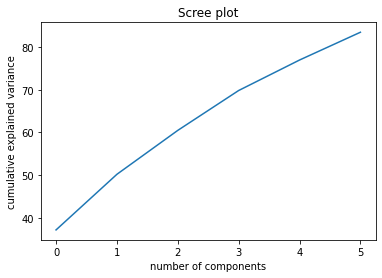

In [44]:
Variance_Explaied=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=6)*100) # cummilative variance
plt.plot(Variance_Explaied)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Scree plot')

$\textbf{Plotting Biplot}$ 

Biplot is a visual representation that shows the contribution of different features on principal components. 

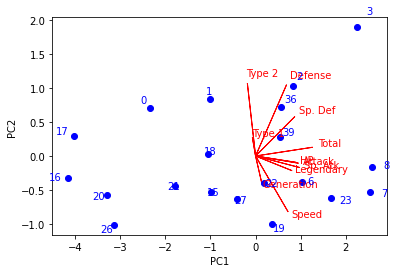

In [45]:
PC1 = All_PCs.iloc[0]
PC2 = All_PCs.iloc[1]

xs =data_new[:20,0]
ys = data_new[:20,1]

for i in range(len(PC1)):
    plt.arrow(0, 0, PC1[i]*max(xs), PC2[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(PC1[i]*max(xs)*1.1, PC2[i]*max(ys)*1.1,
             list(df1.columns.values)[i], color='r')
    
for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i]*1.1, ys[i]*1.1, list(df1.index)[i], color='b')    
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()